In [1]:
import numpy as np
import pandas as pd

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import wordnet
from nltk import FreqDist

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.ldamodel import LdaModel
np.random.seed(2018)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_excel('Rubber News(Client Shared File).xlsx', error_bad_lines=False);

In [5]:
data.shape

(5275, 6)

In [6]:
data = data[["Full.story"]]

In [7]:
data.shape

(5275, 1)

In [8]:
data

,Full.story
0,Sumitomo Rubber Industries has established a n...
1,Spot rubber closed unchanged on Thursday. RSS ...
2,Delegate registration for India Rubber Meet 20...
3,MUMBAI – Futures contracts of rubber on the In...
4,Tapping has been delayed despite the fact that...
...,...
5270,"Cogencis, Wednesday, Apr 11 NEW DELHI – India’..."
5271,"Cogencis, Tuesday, Apr 10 By Prabhnoor Nanda N..."
5272,OUTLOOK Futures contracts of natural rubber ma...
5273,"Cogencis, Tuesday, Apr 10 By Shikha Singh NEW ..."


In [9]:
data.rename(columns = {'Full.story':'full_story'}, inplace = True)

In [10]:
data

,full_story
0,Sumitomo Rubber Industries has established a n...
1,Spot rubber closed unchanged on Thursday. RSS ...
2,Delegate registration for India Rubber Meet 20...
3,MUMBAI – Futures contracts of rubber on the In...
4,Tapping has been delayed despite the fact that...
...,...
5270,"Cogencis, Wednesday, Apr 11 NEW DELHI – India’..."
5271,"Cogencis, Tuesday, Apr 10 By Prabhnoor Nanda N..."
5272,OUTLOOK Futures contracts of natural rubber ma...
5273,"Cogencis, Tuesday, Apr 10 By Shikha Singh NEW ..."


In [11]:
documents = data[['full_story']]
documents.shape

(5275, 1)

In [12]:
documents

,full_story
0,Sumitomo Rubber Industries has established a n...
1,Spot rubber closed unchanged on Thursday. RSS ...
2,Delegate registration for India Rubber Meet 20...
3,MUMBAI – Futures contracts of rubber on the In...
4,Tapping has been delayed despite the fact that...
...,...
5270,"Cogencis, Wednesday, Apr 11 NEW DELHI – India’..."
5271,"Cogencis, Tuesday, Apr 10 By Prabhnoor Nanda N..."
5272,OUTLOOK Futures contracts of natural rubber ma...
5273,"Cogencis, Tuesday, Apr 10 By Shikha Singh NEW ..."


In [13]:
documents[documents.index == 4310]

,full_story
4310,Rubber futures on TOCOM were trading higher du...


## EDA

In [14]:
# !pip install wordcloud

In [15]:
from wordcloud import WordCloud

In [16]:
# Join the different processed titles together.
long_string = ','.join(list(documents['full_story'].values))

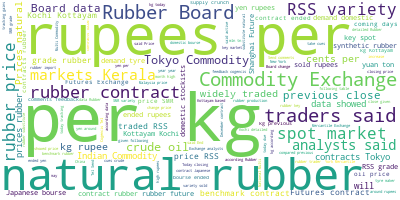

In [17]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=8, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [18]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

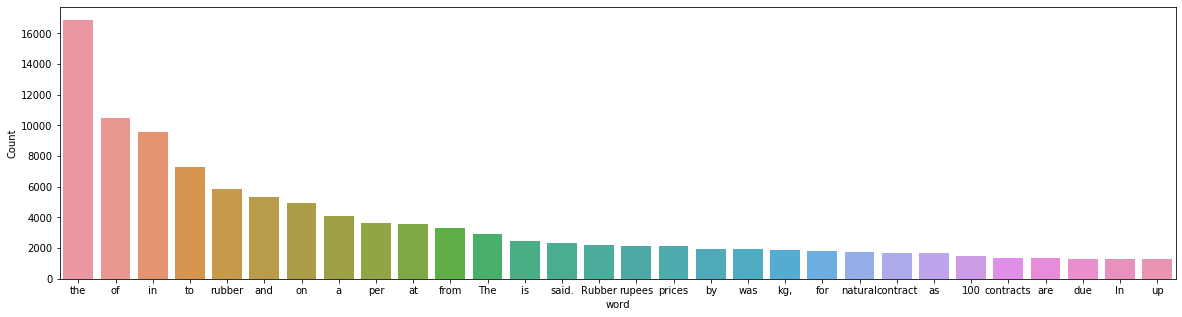

In [19]:
freq_words(documents['full_story'])

In [20]:
documents['full_story'] = documents['full_story'].str.replace("[^a-zA-Z#@]", " ")

## Data processing

In [21]:
# import nltk
# nltk.download('wordnet')

In [22]:
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [105]:
my_stop_words = STOPWORDS.union(set(['send', 'comment', 'feedback', 'today', 'come', 'harsh', 'akshit', 'nishant', 'chakraborty', 'augustine',
                                    'cogencis', 'com', 'rahul', 'dhuri', 'end-users','rupeesedited', 'mugunthan', 'kesavan', 'says', 'said', 'say'
                                     'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 
                                     'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 
                                     'november', 'december','kerela','delhi','kottayam','india','china','japanese','thailand','malaysia','tokyo'
                                    , "come","chinese","prabhnoor","shikha","singh","mumbai","rubber","kerala","kochi","make","board","data","grade"
                                    ,"cents","show","table","detail","change","give","nanda","geojit","iran"])) 

In [106]:
def lemmatize_stemming(text):
#     ps=SnowballStemmer(language='english')
    return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in my_stop_words and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [107]:
doc_sample = documents[documents.index == 4310].values[0][0]

In [108]:
doc_sample

'Rubber futures on TOCOM were trading higher due to signs of a recovery in the Chinese economy  after the release of stronger than expected data on Friday  analysts said  China is the largest consumer of natural rubber '

In [109]:
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\nTokenized and Lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Rubber', 'futures', 'on', 'TOCOM', 'were', 'trading', 'higher', 'due', 'to', 'signs', 'of', 'a', 'recovery', 'in', 'the', 'Chinese', 'economy', '', 'after', 'the', 'release', 'of', 'stronger', 'than', 'expected', 'data', 'on', 'Friday', '', 'analysts', 'said', '', 'China', 'is', 'the', 'largest', 'consumer', 'of', 'natural', 'rubber', '']

Tokenized and Lemmatized document: 
['futures', 'tocom', 'trade', 'higher', 'sign', 'recovery', 'economy', 'release', 'stronger', 'expect', 'analysts', 'largest', 'consumer', 'natural']


In [110]:
processed_docs = documents['full_story'].map(preprocess)
processed_docs

0       [sumitomo, industries, establish, natural, pro...
1       [spot, close, unchanged, quote, steady, trader...
2       [delegate, registration, meet, begin, meet, ho...
3       [futures, contract, indian, commodity, exchang...
4       [tap, delay, despite, fact, peak, season, decl...
                              ...                        
5270    [natural, production, fell, year, accord, prov...
5271    [futures, contract, national, multi, commodity...
5272    [outlook, futures, contract, natural, trade, l...
5273    [price, natural, fell, spot, market, poor, dem...
5274    [monday, futures, contract, national, multi, c...
Name: full_story, Length: 5275, dtype: object

In [111]:
def merging_preprocess(row):
    values = ' '.join(str(row[v]) for v in range(len(row)))
    return values

In [112]:
documents['preprocess_join']=processed_docs.apply(merging_preprocess)

In [113]:
documents['preprocess_join']

0       sumitomo industries establish natural procurem...
1       spot close unchanged quote steady traders fini...
2       delegate registration meet begin meet hold rad...
3       futures contract indian commodity exchange ris...
4       tap delay despite fact peak season decline imp...
                              ...                        
5270    natural production fell year accord provisiona...
5271    futures contract national multi commodity exch...
5272    outlook futures contract natural trade lower s...
5273    price natural fell spot market poor demand tra...
5274    monday futures contract national multi commodi...
Name: preprocess_join, Length: 5275, dtype: object

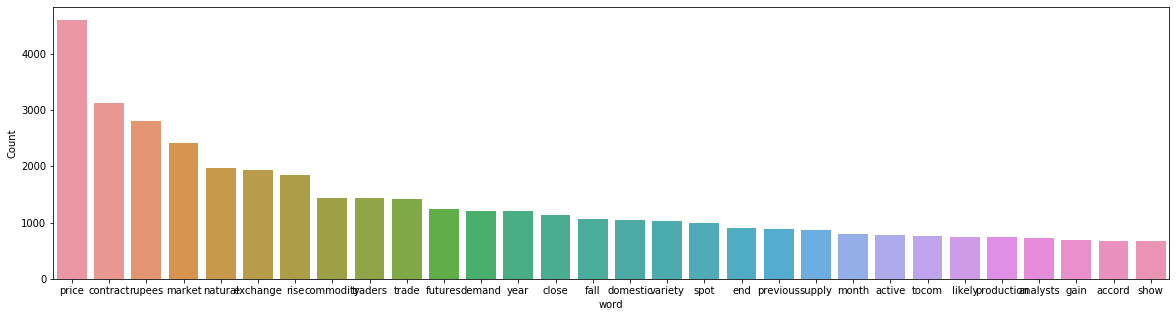

In [114]:
freq_words(documents['preprocess_join'])

## Filters

-- filter tokens less than 15 documents
-- keep only 100000 words

In [115]:
dictionary = gensim.corpora.Dictionary(processed_docs)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 5:
        break

0 establish
1 industries
2 largest
3 natural
4 procurement
5 singapore


In [116]:
dictionary

In [117]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

## Gensim doc2bow-- Creating dictionary from the data

In [118]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [119]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 1 ("largest") appears 1 time.
Word 2 ("natural") appears 1 time.
Word 4 ("trade") appears 1 time.
Word 27 ("futures") appears 1 time.
Word 79 ("analysts") appears 1 time.
Word 89 ("consumer") appears 1 time.
Word 130 ("tocom") appears 1 time.
Word 142 ("expect") appears 1 time.
Word 143 ("higher") appears 1 time.
Word 161 ("economy") appears 1 time.
Word 382 ("release") appears 1 time.
Word 572 ("sign") appears 1 time.
Word 621 ("recovery") appears 1 time.


## Saving pickle files

In [120]:
import pickle
pickle.dump(bow_corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

## LDA

In [121]:
lda_model_batch = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [122]:
lda_model_batch.save('model_lda.gensim')

In [123]:
print(lda_model_batch.print_topics())
doc_lda = lda_model_batch[bow_corpus]

[(0, '0.261*"state" + 0.181*"continue" + 0.156*"increase" + 0.090*"cheaper" + 0.083*"research" + 0.049*"recent" + 0.045*"worry" + 0.044*"flat" + 0.027*"economic" + 0.027*"tepid"'), (1, '0.308*"produce" + 0.138*"face" + 0.098*"plantations" + 0.087*"group" + 0.079*"producers" + 0.075*"plan" + 0.071*"current" + 0.048*"vietnam" + 0.033*"latex" + 0.018*"expand"'), (2, '0.201*"contract" + 0.155*"exchange" + 0.121*"commodity" + 0.074*"rupees" + 0.060*"week" + 0.058*"gain" + 0.054*"benchmark" + 0.046*"higher" + 0.043*"track" + 0.033*"futures"'), (3, '0.235*"rupees" + 0.124*"widely" + 0.113*"rupee" + 0.088*"unchanged" + 0.081*"sell" + 0.071*"variety" + 0.067*"show" + 0.059*"trade" + 0.044*"traders" + 0.036*"cap"'), (4, '0.298*"analysts" + 0.111*"lower" + 0.084*"global" + 0.078*"largest" + 0.042*"investors" + 0.041*"world" + 0.037*"consumer" + 0.035*"firm" + 0.035*"fall" + 0.033*"profit"'), (5, '0.190*"see" + 0.161*"base" + 0.121*"tap" + 0.086*"season" + 0.061*"alencherry" + 0.046*"owner" + 0.04

In [124]:
topics = lda_model_batch.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.261*"state" + 0.181*"continue" + 0.156*"increase" + 0.090*"cheaper" + 0.083*"research"')
(1, '0.308*"produce" + 0.138*"face" + 0.098*"plantations" + 0.087*"group" + 0.079*"producers"')
(2, '0.201*"contract" + 0.155*"exchange" + 0.121*"commodity" + 0.074*"rupees" + 0.060*"week"')
(3, '0.235*"rupees" + 0.124*"widely" + 0.113*"rupee" + 0.088*"unchanged" + 0.081*"sell"')
(4, '0.298*"analysts" + 0.111*"lower" + 0.084*"global" + 0.078*"largest" + 0.042*"investors"')
(5, '0.190*"see" + 0.161*"base" + 0.121*"tap" + 0.086*"season" + 0.061*"alencherry"')
(6, '0.254*"close" + 0.235*"rupees" + 0.119*"previous" + 0.100*"bourse" + 0.096*"come"')
(7, '0.327*"year" + 0.190*"outlook" + 0.185*"natural" + 0.125*"global" + 0.084*"association"')
(8, '0.188*"trader" + 0.167*"decline" + 0.140*"weigh" + 0.120*"base" + 0.076*"largely"')
(9, '0.205*"market" + 0.106*"natural" + 0.102*"spot" + 0.097*"domestic" + 0.083*"demand"')
(10, '0.383*"expect" + 0.234*"output" + 0.102*"estimate" + 0.068*"cover" + 0.0

In [125]:
topics = lda_model_batch.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.261*"state" + 0.181*"continue" + 0.156*"increase" + 0.090*"cheaper" + 0.083*"research" + 0.049*"recent" + 0.045*"worry" + 0.044*"flat"')
(1, '0.308*"produce" + 0.138*"face" + 0.098*"plantations" + 0.087*"group" + 0.079*"producers" + 0.075*"plan" + 0.071*"current" + 0.048*"vietnam"')
(2, '0.201*"contract" + 0.155*"exchange" + 0.121*"commodity" + 0.074*"rupees" + 0.060*"week" + 0.058*"gain" + 0.054*"benchmark" + 0.046*"higher"')
(3, '0.235*"rupees" + 0.124*"widely" + 0.113*"rupee" + 0.088*"unchanged" + 0.081*"sell" + 0.071*"variety" + 0.067*"show" + 0.059*"trade"')
(4, '0.298*"analysts" + 0.111*"lower" + 0.084*"global" + 0.078*"largest" + 0.042*"investors" + 0.041*"world" + 0.037*"consumer" + 0.035*"firm"')
(5, '0.190*"see" + 0.161*"base" + 0.121*"tap" + 0.086*"season" + 0.061*"alencherry" + 0.046*"owner" + 0.042*"grow" + 0.035*"areas"')
(6, '0.254*"close" + 0.235*"rupees" + 0.119*"previous" + 0.100*"bourse" + 0.096*"come" + 0.076*"contract" + 0.057*"active" + 0.049*"end"')
(7, '0

## Model Metrics

In [126]:
print('Perplexity: ', lda_model_batch.log_perplexity(bow_corpus)) 

Perplexity:  -11.818964763758563


In [127]:
from gensim.models import CoherenceModel
coherence_model_lda_c_v = CoherenceModel(model=lda_model_batch, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda_c_v.get_coherence()
print('Coherence Score for c_v: ', coherence_lda)

Coherence Score for c_v:  0.3965778953756843


In [128]:
coherence_model_lda_u_mass = CoherenceModel(model=lda_model_batch, texts=processed_docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda_u_mass.get_coherence()
print('Coherence Score for u_mass: ', coherence_lda)

Coherence Score for u_mass:  -4.673057546428844


## Optimal Topics

In [129]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [48]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=20, step=1)
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.xticks(x)
plt.legend(("coherence_values"), loc='best')
plt.show()

KeyboardInterrupt: 

## Best model run

In [130]:
lda_model_best = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [131]:
lda_model_best.save('model_bow_best.gensim')

In [132]:
print(lda_model_best.print_topics())
doc_lda_best = lda_model_best[bow_corpus]

[(0, '0.057*"price" + 0.048*"market" + 0.037*"rise" + 0.036*"natural" + 0.036*"domestic" + 0.033*"demand" + 0.032*"likely" + 0.030*"supply" + 0.027*"fall" + 0.025*"spot"'), (1, '0.021*"month" + 0.020*"year" + 0.018*"national" + 0.017*"give" + 0.016*"multi" + 0.015*"company" + 0.014*"index" + 0.013*"price" + 0.013*"heavy" + 0.012*"state"'), (2, '0.129*"rupees" + 0.074*"price" + 0.073*"contract" + 0.064*"close" + 0.046*"commodity" + 0.043*"exchange" + 0.034*"previous" + 0.032*"market" + 0.027*"end" + 0.026*"active"'), (3, '0.064*"price" + 0.056*"contract" + 0.051*"crude" + 0.051*"futures" + 0.048*"exchange" + 0.046*"analysts" + 0.038*"tocom" + 0.030*"fell" + 0.028*"accord" + 0.026*"cue"')]


In [133]:
topics_best = lda_model_best.print_topics(num_words=5)
for topic in topics_best:
    print(topic)

(0, '0.057*"price" + 0.048*"market" + 0.037*"rise" + 0.036*"natural" + 0.036*"domestic"')
(1, '0.021*"month" + 0.020*"year" + 0.018*"national" + 0.017*"give" + 0.016*"multi"')
(2, '0.129*"rupees" + 0.074*"price" + 0.073*"contract" + 0.064*"close" + 0.046*"commodity"')
(3, '0.064*"price" + 0.056*"contract" + 0.051*"crude" + 0.051*"futures" + 0.048*"exchange"')


In [134]:
topics_best = lda_model_best.print_topics(num_words=8)
for topic in topics_best:
    print(topic)

(0, '0.057*"price" + 0.048*"market" + 0.037*"rise" + 0.036*"natural" + 0.036*"domestic" + 0.033*"demand" + 0.032*"likely" + 0.030*"supply"')
(1, '0.021*"month" + 0.020*"year" + 0.018*"national" + 0.017*"give" + 0.016*"multi" + 0.015*"company" + 0.014*"index" + 0.013*"price"')
(2, '0.129*"rupees" + 0.074*"price" + 0.073*"contract" + 0.064*"close" + 0.046*"commodity" + 0.043*"exchange" + 0.034*"previous" + 0.032*"market"')
(3, '0.064*"price" + 0.056*"contract" + 0.051*"crude" + 0.051*"futures" + 0.048*"exchange" + 0.046*"analysts" + 0.038*"tocom" + 0.030*"fell"')


In [135]:
print('Perplexity: ', lda_model_best.log_perplexity(bow_corpus)) 

Perplexity:  -5.768329720101713


In [136]:
from gensim.models import CoherenceModel
coherence_model_lda_c_v = CoherenceModel(model=lda_model_best, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda_c_v.get_coherence()
print('Coherence Score for c_v: ', coherence_lda)

Coherence Score for c_v:  0.7160431196112311


In [137]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 40);
        word_dict['Topic #' + '{:02d}'.format(i)] = [i[0] for i in words];
    return pd.DataFrame(word_dict)

In [138]:
get_lda_topics(lda_model_best, 4)

,Topic #00,Topic #01,Topic #02,Topic #03
0,price,month,rupees,price
1,market,year,price,contract
2,rise,national,contract,crude
3,natural,give,close,futures
4,domestic,multi,commodity,exchange
5,demand,company,exchange,analysts
6,likely,index,previous,tocom
7,supply,price,market,fell
8,fall,heavy,end,accord
9,spot,state,active,cue


## Visualize topic keywords from best model

In [139]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model_bow_best.gensim')

In [140]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## Train Data Mapping

In [141]:
documents_copy= documents.copy()

In [142]:
documents_copy

,full_story,preprocess_join
0,Sumitomo Rubber Industries has established a n...,sumitomo industries establish natural procurem...
1,Spot rubber closed unchanged on Thursday RSS ...,spot close unchanged quote steady traders fini...
2,Delegate registration for India Rubber Meet ...,delegate registration meet begin meet hold rad...
3,MUMBAI Futures contracts of rubber on the In...,futures contract indian commodity exchange ris...
4,Tapping has been delayed despite the fact that...,tap delay despite fact peak season decline imp...
...,...,...
5270,Cogencis Wednesday Apr NEW DELHI India ...,natural production fell year accord provisiona...
5271,Cogencis Tuesday Apr By Prabhnoor Nanda N...,futures contract national multi commodity exch...
5272,OUTLOOK Futures contracts of natural rubber ma...,outlook futures contract natural trade lower s...
5273,Cogencis Tuesday Apr By Shikha Singh NEW ...,price natural fell spot market poor demand tra...


In [143]:
def identify_topic_sentence(row):
    bow_vector = dictionary.doc2bow(preprocess(row['full_story']))
    row1= lda_model_best[bow_vector][0]
    row1 = sorted(row1, key=lambda x: (x[1]), reverse=True)
    
    topic_num= row1[0][0]
    prop_topic= row1[0][1]
    wp = lda_model_best.show_topic(topic_num)
    topic_keywords = ", ".join([word for word, prop in wp])
    row['Topic_NUmber']= int(topic_num)
    if int(topic_num)== 1:
        row['Topic_name']= 'Domestic market supply demand'
    elif int(topic_num)== 2:
        row['Topic_name']= 'Rubber price comparison'
    elif int(topic_num)== 3:
        row['Topic_name']= 'Commodity market price'
    else:
        row['Topic_name']= 'Stock exchange analysis' 
    row['Topic_Propability']= round(prop_topic,3)
    row['Keywords']= topic_keywords
    
    return row

In [144]:
doc= documents_copy.apply(identify_topic_sentence,axis=1)

In [145]:
doc.drop(['preprocess_join'],axis=1, inplace=True)

In [146]:
doc

,full_story,Topic_NUmber,Topic_name,Topic_Propability,Keywords
0,Sumitomo Rubber Industries has established a n...,0,Stock exchange analysis,0.462,"price, market, rise, natural, domestic, demand..."
1,Spot rubber closed unchanged on Thursday RSS ...,2,Rubber price comparison,0.757,"rupees, price, contract, close, commodity, exc..."
2,Delegate registration for India Rubber Meet ...,1,Domestic market supply demand,0.899,"month, year, national, give, multi, company, i..."
3,MUMBAI Futures contracts of rubber on the In...,2,Rubber price comparison,0.742,"rupees, price, contract, close, commodity, exc..."
4,Tapping has been delayed despite the fact that...,0,Stock exchange analysis,0.892,"price, market, rise, natural, domestic, demand..."
...,...,...,...,...,...
5270,Cogencis Wednesday Apr NEW DELHI India ...,0,Stock exchange analysis,0.424,"price, market, rise, natural, domestic, demand..."
5271,Cogencis Tuesday Apr By Prabhnoor Nanda N...,0,Stock exchange analysis,0.450,"price, market, rise, natural, domestic, demand..."
5272,OUTLOOK Futures contracts of natural rubber ma...,3,Commodity market price,0.685,"price, contract, crude, futures, exchange, ana..."
5273,Cogencis Tuesday Apr By Shikha Singh NEW ...,0,Stock exchange analysis,0.392,"price, market, rise, natural, domestic, demand..."


In [147]:
doc.to_excel('LDA_BOW_Input_Mapping.xlsx')

## Evaluation

In [187]:
test_document1 = 'MUMBAI – Rubber contracts on the Indian Commodity Exchange fell today tracking the benchmark contracts on Tokyo Commodity Exchange, traders said. The most-active February contract ended at 14,100 rupees per 100 kg, down 0.2% from the pervious close'
bow_vector = dictionary.doc2bow(preprocess(test_document1))

In [188]:
print(lda_model_best.get_document_topics(bow_vector))

[(0, 0.010566269), (1, 0.96880543), (2, 0.013036869)]


In [189]:
for i in range(len(bow_vector)):
    print("Word {} (\"{}\") ".format(bow_vector[i], 
                                               dictionary[bow_vector[i][0]]))

Word (0, 1) ("active") 
Word (1, 1) ("benchmark") 
Word (2, 1) ("close") 
Word (3, 2) ("commodity") 
Word (4, 3) ("contract") 
Word (5, 2) ("exchange") 
Word (7, 1) ("february") 
Word (8, 1) ("indian") 
Word (9, 1) ("mumbai") 
Word (11, 1) ("today") 
Word (12, 1) ("tokyo") 
Word (13, 1) ("track") 


In [190]:
# lda_model_best[bow_vector]

In [191]:
sent_topics_df = pd.DataFrame()
row= lda_model_best[bow_vector][0]
row = sorted(row, key=lambda x: (x[1]), reverse=True)



# for i, (topic_num, prop_topic) in enumerate(row):
#     wp = lda_model_best.show_topic(topic_num)
#     topic_keywords = ", ".join([word for word, prop in wp])
#     sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

# print(sent_topics_df)

topic_num= row[0][0]
prop_topic= row[0][1]
wp = lda_model_best.show_topic(topic_num)
topic_keywords = ", ".join([word for word, prop in wp])
sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

In [192]:
contents = pd.Series(test_document1)
sent_topics_df = pd.concat([contents,sent_topics_df], axis=1, ignore_index= True)
sent_topics_df.rename(columns = {0:'Input_document', 1: 'Topic_NUmber', 2: 'Topic_Propability', 3: 'Keywords'}, inplace = True)

In [193]:
sent_topics_df

,Input_document,Topic_NUmber,Topic_Propability,Keywords
0,MUMBAI – Rubber contracts on the Indian Commod...,1.0,0.9688,"contract, exchange, rupee, commodity, price, f..."


In [181]:
test_document3 = 'Today thailand recieved the highest rainfall. It may effect the production of natural rubber as well to a greater extent.'
bow_vector = dictionary.doc2bow(preprocess(test_document3))

In [182]:
print(lda_model_best.get_document_topics(bow_vector))

[(0, 0.46492192), (1, 0.024663068), (2, 0.3061411), (3, 0.20427391)]


In [183]:
sent_topics_df = pd.DataFrame()
row= lda_model_best[bow_vector][0]
row = sorted(row, key=lambda x: (x[1]), reverse=True)

topic_num= row[0][0]
prop_topic= row[0][1]
wp = lda_model_best.show_topic(topic_num)
topic_keywords = ", ".join([word for word, prop in wp])
sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)

In [184]:
contents = pd.Series(test_document1)
sent_topics_df = pd.concat([contents,sent_topics_df], axis=1, ignore_index= True)
sent_topics_df.rename(columns = {0:'Input_document', 1: 'Topic_NUmber', 2: 'Topic_Propability', 3: 'Keywords'}, inplace = True)

In [186]:
sent_topics_df

,Input_document,Topic_NUmber,Topic_Propability,Keywords
0,MUMBAI – Rubber contracts on the Indian Commod...,0.0,0.4649,"india, month, year, send, comment, feedback, r..."
